In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import zipfile
import matplotlib.pyplot as plt

In [2]:
train_file = zipfile.ZipFile('train.json.zip', 'r')
train_data = pd.read_json(train_file.read('train.json'))
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [4]:
cuisine_dict_count = {} # Initialize an empty dictionary for cuisines
for c_count in train_data['cuisine']:
    if c_count in cuisine_dict_count.keys():
        cuisine_dict_count[c_count] += 1
        # Increment the count by 1
    else:
        cuisine_dict_count[c_count] = 1

In [5]:
ingredient_dict_count = {} # Initialize an empty dictionary for ingredients
for b in train_data['ingredients']: # b is a set of ingredients for each cuisine
    for a in b:
        # a is an ingredient from the given set of ingredients
        if a in ingredient_dict_count.keys():
            ingredient_dict_count[a] += 1
            # Increment the count by 1
        else:
            ingredient_dict_count[a] = 1

In [6]:
len(ingredient_dict_count)

6714

In [7]:
for e in ingredient_dict_count.keys():
    train_data[e] = np.zeros((train_data.shape[0], 1))
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
for i in range(len(train_data)):
    for j in train_data['ingredients'][i]:
        train_data[j].iloc[i] = 1
        # 1 means the ingredient is present

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ingredient_dict_count # This shows the number of ingredients used for all the cuisines

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

In [11]:
data = pd.DataFrame(list(cuisine_dict_count.keys()), columns = ['cuisine'])
# To create a new dataframe
data

,cuisine
0,greek
1,southern_us
2,filipino
3,indian
4,jamaican
5,spanish
6,italian
7,mexican
8,chinese
9,british


In [12]:
for cols in ingredient_dict_count.keys():
    data[cols] = np.zeros((data.shape[0], 1))
data

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,mexican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X = train_data.drop(['id','ingredients'],axis=1)
# To drop id and ingredients columns
X

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,italian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
count_row = -1
for cuisine_type in cuisine_dict_count.keys():
    Y = X.loc[X["cuisine"] == cuisine_type]
    # X is a dataframe without id and ingredients column
    # Y is a dataframe with only particular cuisine shown
    count_row += 1
    count_column = 1
    for ingredient_type in ingredient_dict_count.keys():
        total = Y[ingredient_type].sum()
        data.iloc[[count_row],[count_column]] = total
        count_column += 1

In [15]:
data

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,39.0,31.0,26.0,216.0,203.0,186.0,3.0,23.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,southern_us,8.0,3.0,14.0,259.0,549.0,95.0,17.0,1.0,3.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,1.0,325.0,199.0,13.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,3.0,0.0,5.0,726.0,205.0,170.0,5.0,36.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jamaican,0.0,0.0,0.0,139.0,125.0,26.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,spanish,4.0,4.0,6.0,128.0,133.0,55.0,2.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,italian,33.0,67.0,98.0,1471.0,965.0,350.0,12.0,18.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,mexican,103.0,92.0,53.0,1317.0,806.0,618.0,31.0,17.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,chinese,13.0,0.0,2.0,763.0,158.0,33.0,11.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,british,0.0,0.0,0.0,34.0,88.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Create array for the cuisines 
cuisines = ['greek','southern_us','filipino','indian','jamaican','spanish','italian','mexican','chinese','british','thai','vietnamese','cajun_creole','brazilian','french','japanese','irish','korean','moroccan','russian']
print(cuisines)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


In [17]:
cuisine_dict_count.keys()

dict_keys(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'])

In [18]:
list(data['cuisine'])

['greek',
 'southern_us',
 'filipino',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'chinese',
 'british',
 'thai',
 'vietnamese',
 'cajun_creole',
 'brazilian',
 'french',
 'japanese',
 'irish',
 'korean',
 'moroccan',
 'russian']

# How many cuisine dishes use one specific ingredient 

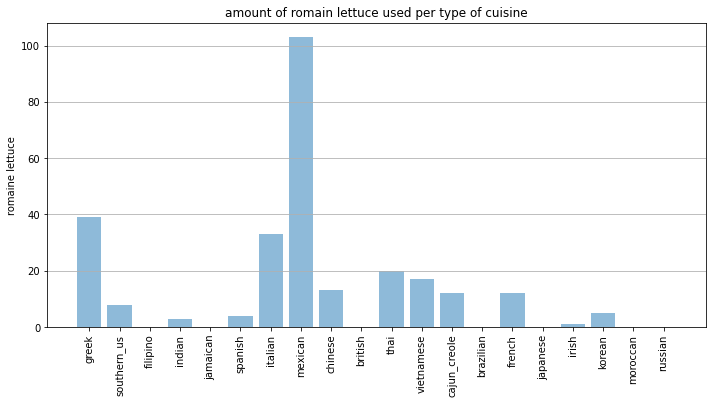

In [31]:
# Build the bar plot for romaine lettuce
fig, ax = plt.subplots()

ax.bar(cuisines, data['romaine lettuce'], align='center', alpha=0.5)
ax.set_ylabel('romaine lettuce')
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('amount of romain lettuce used per type of cuisine')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation=90)
plt.show()

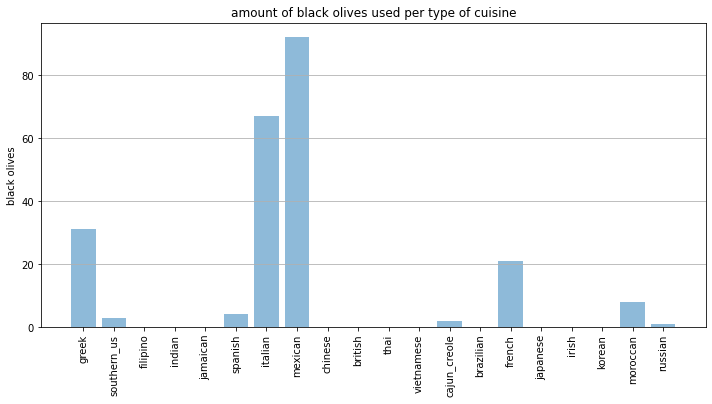

In [27]:
# Build the bar plot for romaine lettuce
fig, ax = plt.subplots()

ax.bar(cuisines, data['black olives'], align='center', alpha=0.5)
ax.set_ylabel('black olives')
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('amount of black olives used per type of cuisine')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation=90)
plt.show()

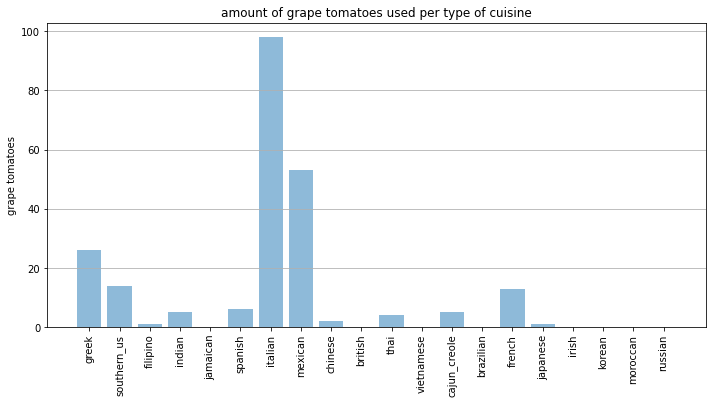

In [28]:
# Build the bar plot for romaine lettuce
fig, ax = plt.subplots()

ax.bar(cuisines, data['grape tomatoes'], align='center', alpha=0.5)
ax.set_ylabel('grape tomatoes')
ax.set_xticks(cuisines)
ax.set_xticklabels(cuisines)
ax.set_title('amount of grape tomatoes used per type of cuisine')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.xticks(rotation=90)
plt.show()

## What is the cuisine's ingredients shared percentage with other cuisine ingredients?

In [22]:
x = "romaine lettuce"
romainelettuce_sum = data[x].sum()
print(romainelettuce_sum)
y = "black olives"
blackolives_sum = data[y].sum()
print(blackolives_sum)
z = "grape tomatoes"
grapetomatoes_sum = data[z].sum()
print(grapetomatoes_sum)

270.0
229.0
228.0


         cuisine  romaine lettuce  percentage of romaine lettuce
0          greek             39.0                      14.444444
1    southern_us              8.0                       2.962963
2       filipino              0.0                       0.000000
3         indian              3.0                       1.111111
4       jamaican              0.0                       0.000000
5        spanish              4.0                       1.481481
6        italian             33.0                      12.222222
7        mexican            103.0                      38.148148
8        chinese             13.0                       4.814815
9        british              0.0                       0.000000
10          thai             20.0                       7.407407
11    vietnamese             17.0                       6.296296
12  cajun_creole             12.0                       4.444444
13     brazilian              0.0                       0.000000
14        french         

<ipython-input-23-6e170ab75570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100


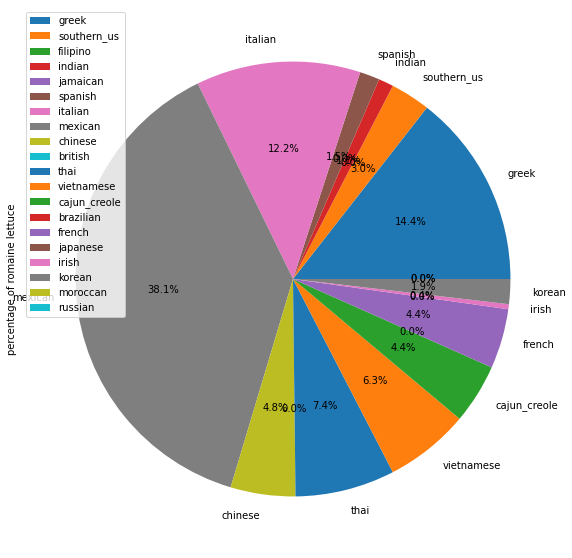

In [23]:
romainelettucecolumn = data[["cuisine","romaine lettuce"]]
romainelettucecolumn['percentage of romaine lettuce'] = romainelettucecolumn['romaine lettuce']/romainelettucecolumn['romaine lettuce'].sum()*100
print(romainelettucecolumn)
romainelettucecolumn.plot(y = 'percentage of romaine lettuce', figsize=(45,10), kind = 'pie', autopct='%1.1f%%', labels = ['greek','southern_us','filipino','indian','jamaican','spanish','italian','mexican','chinese','british','thai','vietnamese','cajun_creole','brazilian','french','japanese','irish','korean','moroccan','russian'])
plt.show()

<ipython-input-24-ffdb31754a4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100


         cuisine  black olives  percentage of black olives
0          greek          31.0                   13.537118
1    southern_us           3.0                    1.310044
2       filipino           0.0                    0.000000
3         indian           0.0                    0.000000
4       jamaican           0.0                    0.000000
5        spanish           4.0                    1.746725
6        italian          67.0                   29.257642
7        mexican          92.0                   40.174672
8        chinese           0.0                    0.000000
9        british           0.0                    0.000000
10          thai           0.0                    0.000000
11    vietnamese           0.0                    0.000000
12  cajun_creole           2.0                    0.873362
13     brazilian           0.0                    0.000000
14        french          21.0                    9.170306
15      japanese           0.0                    0.0000

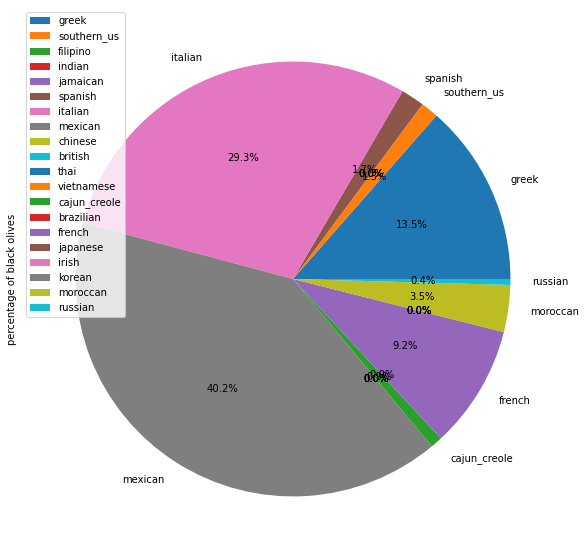

In [24]:
blackolivescolumn = data[["cuisine","black olives"]]
blackolivescolumn['percentage of black olives'] = blackolivescolumn['black olives']/blackolivescolumn['black olives'].sum()*100
print(blackolivescolumn)
blackolivescolumn.plot(y= 'percentage of black olives', figsize=(45,10), kind = 'pie', autopct='%1.1f%%', labels = ['greek','southern_us','filipino','indian','jamaican','spanish','italian','mexican','chinese','british','thai','vietnamese','cajun_creole','brazilian','french','japanese','irish','korean','moroccan','russian'])
plt.show()

<ipython-input-25-a694d923342c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100


         cuisine  grape tomatoes  percentage of grape tomatoes
0          greek            26.0                     11.403509
1    southern_us            14.0                      6.140351
2       filipino             1.0                      0.438596
3         indian             5.0                      2.192982
4       jamaican             0.0                      0.000000
5        spanish             6.0                      2.631579
6        italian            98.0                     42.982456
7        mexican            53.0                     23.245614
8        chinese             2.0                      0.877193
9        british             0.0                      0.000000
10          thai             4.0                      1.754386
11    vietnamese             0.0                      0.000000
12  cajun_creole             5.0                      2.192982
13     brazilian             0.0                      0.000000
14        french            13.0                      5

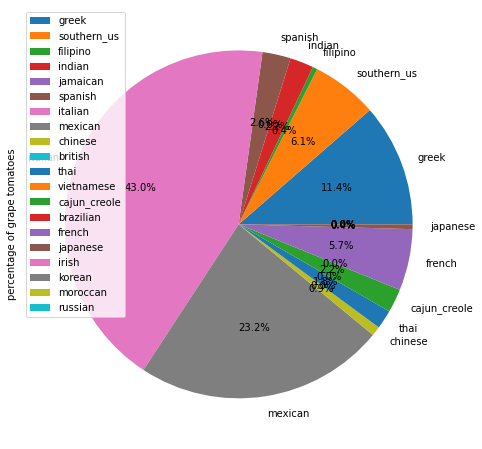

In [25]:
grapetomatoescolumn = data[["cuisine","grape tomatoes"]]
grapetomatoescolumn['percentage of grape tomatoes'] = grapetomatoescolumn['grape tomatoes']/grapetomatoescolumn['grape tomatoes'].sum()*100
print(grapetomatoescolumn)
grapetomatoescolumn.plot(y= 'percentage of grape tomatoes', figsize=(45,8), kind = 'pie', autopct='%1.1f%%', labels = ['greek','southern_us','filipino','indian','jamaican','spanish','italian','mexican','chinese','british','thai','vietnamese','cajun_creole','brazilian','french','japanese','irish','korean','moroccan','russian'])
plt.show()